![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [106]:
# Start your code here!
import pandas as pd

women_results = pd.read_csv("women_results.csv", index_col=0, parse_dates=['date'])
men_results = pd.read_csv("men_results.csv", index_col = 0, parse_dates=['date'])
display(women_results.head())
display(men_results.head())

,date,home_team,away_team,home_score,away_score,tournament
0,1969-11-01,Italy,France,1,0,Euro
1,1969-11-01,Denmark,England,4,3,Euro
2,1969-11-02,England,France,2,0,Euro
3,1969-11-02,Italy,Denmark,3,1,Euro
4,1975-08-25,Thailand,Australia,3,2,AFC Championship


,date,home_team,away_team,home_score,away_score,tournament
0,1872-11-30,Scotland,England,0,0,Friendly
1,1873-03-08,England,Scotland,4,2,Friendly
2,1874-03-07,Scotland,England,2,1,Friendly
3,1875-03-06,England,Scotland,2,2,Friendly
4,1876-03-04,Scotland,England,3,0,Friendly


In [107]:
women_results['total_goals'] = women_results.away_score+women_results.home_score
men_results['total_goals'] = men_results.away_score+men_results.home_score

In [108]:
women_results.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4884 entries, 0 to 4883
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4884 non-null   datetime64[ns]
 1   home_team    4884 non-null   object        
 2   away_team    4884 non-null   object        
 3   home_score   4884 non-null   int64         
 4   away_score   4884 non-null   int64         
 5   tournament   4884 non-null   object        
 6   total_goals  4884 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 305.2+ KB


In [109]:
date = women_results['date']>='2002-01-01'
tornament = women_results['tournament']=='FIFA World Cup'

women_Fifa = women_results[date & tornament]
display(women_Fifa)

,date,home_team,away_team,home_score,away_score,tournament,total_goals
1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3
1601,2003-09-20,Norway,France,2,0,FIFA World Cup,2
1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5
1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6
1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4
...,...,...,...,...,...,...,...
4465,2019-06-29,Germany,Sweden,1,2,FIFA World Cup,3
4466,2019-07-02,England,United States,1,2,FIFA World Cup,3
4467,2019-07-03,Netherlands,Sweden,1,0,FIFA World Cup,1
4468,2019-07-06,England,Sweden,1,2,FIFA World Cup,3


In [110]:
date = men_results['date']>='2002-01-01'
tournament = men_results['tournament']=="FIFA World Cup"

men_Fifa = men_results[date & tournament]
display(men_Fifa)

,date,home_team,away_team,home_score,away_score,tournament,total_goals
25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1
25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8
25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2
25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3
25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1
...,...,...,...,...,...,...,...
44343,2022-12-10,England,France,1,2,FIFA World Cup,3
44345,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,3
44346,2022-12-14,France,Morocco,2,0,FIFA World Cup,2
44350,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,3


<AxesSubplot: xlabel='total_goals', ylabel='Count'>

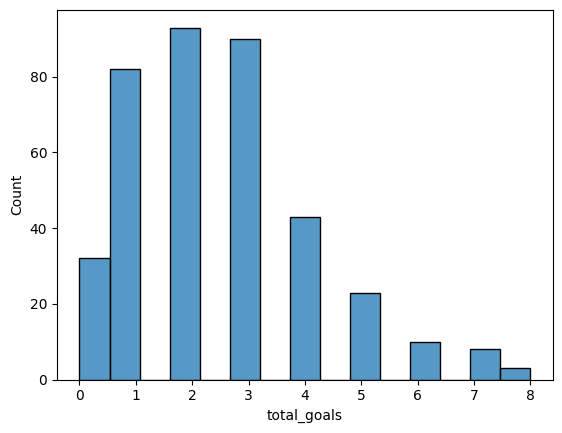

In [111]:
#EDA to determine the hypothsis test to use.

import seaborn as sns

sns.histplot(men_Fifa["total_goals"])

<AxesSubplot: xlabel='total_goals', ylabel='Count'>

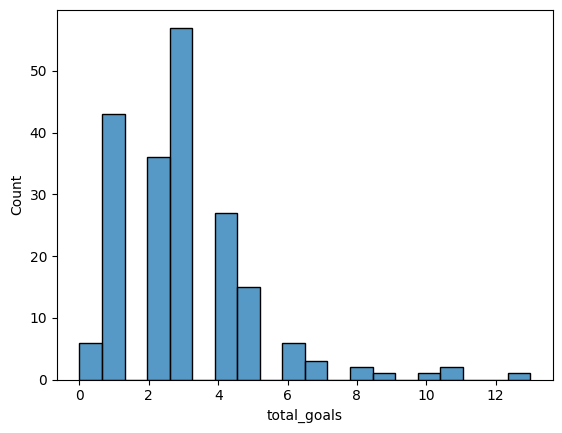

In [112]:
sns.histplot(women_Fifa["total_goals"])

In [113]:
men_Fifa['sex']="Men"
women_Fifa['sex']="Women"

full_data = pd.concat([men_Fifa, women_Fifa], ignore_index=True)

display(full_data.head())

,date,home_team,away_team,home_score,away_score,tournament,total_goals,sex
0,2002-05-31,France,Senegal,0,1,FIFA World Cup,1,Men
1,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8,Men
2,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2,Men
3,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3,Men
4,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1,Men


In [114]:
subset = full_data[['sex','total_goals']]
full_data_wide=subset.pivot(columns='sex', values= 'total_goals')

display(full_data_wide.head())

sex,Men,Women
0,1.0,NaN
1,8.0,NaN
2,2.0,NaN
3,3.0,NaN
4,1.0,NaN


In [115]:
import pingouin

In [116]:
findings = pingouin.mwu(y=full_data_wide['Men'], x = full_data_wide['Women'], alternative='greater')

print(findings)

       U-val alternative     p-val       RBC      CLES
MWU  43273.0     greater  0.005107 -0.126901  0.563451


In [117]:
p_val = round(findings['p-val'].values[0], 4)

print(p_val)

print(0.01>=p_val)

0.0051
True


In [121]:
result = "reject"

dictionary = {"p_val": p_val, "result": result}

print(dictionary)

{'p_val': 0.0051, 'result': 'reject'}
